## 收集

In [51]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json

In [52]:
archive = pd.read_csv('./twitter-archive-enhanced.csv')


In [3]:
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
response = requests.get(url)
with open(url.split('/')[-1],mode='wb')as file:
    file.write(response.content)

images = pd.read_csv('./image-predictions.tsv', sep = '\t')


In [4]:
# 使用自己的twitter api
consumer_key = '******'
consumer_secret = '******'
access_token = '******'
access_secret = '******'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [5]:
def getMissingData(api, tweet_ids, times):
    failed_ids = []
    df = []
    
    for id in tweet_ids:
        try:
            new = api.get_status(id,tweet_mode='extended')._json
            favorites = new['favorite_count']
            retweets = new['retweet_count']
            df.append({'tweet_id': int(id),
                      'favorite': int(favorites),
                      'retweet': int(retweets)})
        except Exception as e:
            failed_ids.append(id)
    print("failed:",len(failed_ids))
    
    if times > 0 and len(failed_ids) > 0:
        times = times-1
        df_in = getMissingData(api,failed_ids,times)
        df = df+df_in
        
    return df
        

In [6]:
tweet_ids= images['tweet_id']
df = getMissingData(api,tweet_ids,20)
df[0:100]

failed: 1267
failed: 1267
failed: 1266
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 367
failed: 366
failed: 366
failed: 366
failed: 163
failed: 7
failed: 7
failed: 7
failed: 7


[{'favorite': 2566, 'retweet': 516, 'tweet_id': 666020888022790149},
 {'favorite': 129, 'retweet': 47, 'tweet_id': 666029285002620928},
 {'favorite': 125, 'retweet': 44, 'tweet_id': 666033412701032449},
 {'favorite': 299, 'retweet': 141, 'tweet_id': 666044226329800704},
 {'favorite': 109, 'retweet': 41, 'tweet_id': 666049248165822465},
 {'favorite': 133, 'retweet': 58, 'tweet_id': 666050758794694657},
 {'favorite': 1223, 'retweet': 852, 'tweet_id': 666051853826850816},
 {'favorite': 434, 'retweet': 252, 'tweet_id': 666055525042405380},
 {'favorite': 298, 'retweet': 142, 'tweet_id': 666057090499244032},
 {'favorite': 111, 'retweet': 57, 'tweet_id': 666058600524156928},
 {'favorite': 475, 'retweet': 219, 'tweet_id': 666063827256086533},
 {'favorite': 148, 'retweet': 62, 'tweet_id': 666071193221509120},
 {'favorite': 322, 'retweet': 164, 'tweet_id': 666073100786774016},
 {'favorite': 119, 'retweet': 45, 'tweet_id': 666082916733198337},
 {'favorite': 164, 'retweet': 74, 'tweet_id': 6660940

In [ ]:
df_new = pd.DataFrame(df)
df_new.to_csv('tweet_json.txt',index = False, encoding = 'utf-8')

In [6]:
tweet_json = pd.read_csv('tweet_json.txt',encoding = 'utf-8')

## 评估

In [7]:
tweet_json

,favorite,retweet,tweet_id
0,2566,516,666020888022790149
1,129,47,666029285002620928
2,125,44,666033412701032449
3,299,141,666044226329800704
4,109,41,666049248165822465
5,133,58,666050758794694657
6,1223,852,666051853826850816
7,434,252,666055525042405380
8,298,142,666057090499244032
9,111,57,666058600524156928


In [8]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 3 columns):
favorite    2068 non-null int64
retweet     2068 non-null int64
tweet_id    2068 non-null int64
dtypes: int64(3)
memory usage: 48.5 KB


In [13]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2209,668623201287675904,NaN,NaN,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jomathan. He is not thrilled about the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668623201...,10,10,Jomathan,None,None,None,None
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
2223,668297328638447616,NaN,NaN,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668297328...,9,10,None,None,None,None,None
2180,669000397445533696,NaN,NaN,2015-11-24 03:51:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None


In [14]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False


In [15]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
an             7
Toby           7
Buddy          7
Bailey         7
Jax            6
Dave           6
Oscar          6
Leo            6
Rusty          6
Koda           6
Scout          6
Stanley        6
Jack           6
Milo           6
Bella          6
Bentley        5
            ... 
Jarod          1
Ronnie         1
Todo           1
Enchilada      1
Akumi          1
Frönq          1
Coleman        1
Pherb          1
Danny          1
Gunner         1
Linus          1
Cheryl         1
Stewie         1
Tino           1
Amber          1
Teddy          1
Monty          1
DayZ           1
Theo           1
Aja            1
Obie           1
Bradlay        1
Lacy           1
Kuyu           1
Hubertson      1
Venti          1
Mason          1
Brady         

In [16]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## 评估

### 质量问题

#### twitter-archive-enhanced.csv
- 存在被转发的数据
- 有几列出现了严重的缺失，如in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp 
- doggo，floofer，pupper，puppo四列值为None
- expanded_urls列有空值
- name列有空值和异常值
- rating_numerator列和rating_denominator列均有异常值
- rating_denominator列有非数字形式的值
- expanded_urls列有很多重复值


### 整洁度

#### twitter-archive-enhanced.csv
- doggo，floofer，pupper，puppo不应该作为列名
- name列的None是空值但是会被当成有效值来处理
- 三个数据片段需要进行合并

## 清洗

In [18]:
twitter_archive_enhanced_clean = archive.copy()

- 将retweeted_status_id, retweeted_status_user_id 或 retweeted_status_timestamp 中存在非空值的整行删除

In [19]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_user_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_timestamp.isnull()]

In [20]:
twitter_archive_enhanced_clean.retweeted_status_id.notnull().sum()

0

In [21]:
twitter_archive_enhanced_clean.retweeted_status_user_id.notnull().sum()

0

In [22]:
twitter_archive_enhanced_clean.retweeted_status_timestamp.notnull().sum()

0

In [23]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

- in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp对研究没有太大的影响，将这几列删除。

In [24]:
del twitter_archive_enhanced_clean['in_reply_to_status_id']
del twitter_archive_enhanced_clean['in_reply_to_user_id']
del twitter_archive_enhanced_clean['retweeted_status_id']
del twitter_archive_enhanced_clean['retweeted_status_user_id']
del twitter_archive_enhanced_clean['retweeted_status_timestamp']

In [25]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


- 从text中匹配狗的doggo，floofer，pupper，puppo ，新生成一列名为stage

In [26]:
twitter_archive_enhanced_clean['stage']=twitter_archive_enhanced_clean.text.str.lower().str.findall('(doggo|pupper|puppo|floof)')          

In [27]:
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].apply(lambda x: ','.join(set(x)))

In [28]:
twitter_archive_enhanced_clean['stage'].replace('', np.nan, inplace = True)

In [29]:
twitter_archive_enhanced_clean.stage.value_counts()

pupper          249
doggo            81
floof            36
puppo            31
doggo,pupper     10
doggo,puppo       2
floof,doggo       2
floof,pupper      1
Name: stage, dtype: int64

- 将doggo，floofer，pupper，puppo这四列删除

In [30]:
del twitter_archive_enhanced_clean['doggo']
del twitter_archive_enhanced_clean['floofer']
del twitter_archive_enhanced_clean['pupper']
del twitter_archive_enhanced_clean['puppo']

In [31]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 412 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


- name列存在类似于a,an,the,None的不是名称的异常值，应将其改为正确的空值形式。

In [32]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace(['a','an','the','None'],np.nan)

In [33]:
twitter_archive_enhanced_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Oscar          6
Jax            6
Stanley        6
Bella          6
Bo             6
Koda           6
Milo           5
Leo            5
Dave           5
Rusty          5
Chester        5
Buddy          5
Bentley        5
Louis          5
Scout          5
Sammy          4
Brody          4
Alfie          4
              ..
Aldrick        1
Lucky          1
Theo           1
Aja            1
Obie           1
Bradlay        1
Lacy           1
Billl          1
such           1
Burt           1
Duddles        1
Vinnie         1
Christoper     1
Carly          1
Dawn           1
Reptar         1
Jareld         1
Ralpher        1
Barney         1
Emanuel        1
Zara           1
Emmie          1
Nico           1
General        1
Mattie         1
Eleanor        1
Gerbald        1
Opie          

- expanded_urls每一个逗号之后又会重复一次，应截取第一个逗号前的字符串

In [34]:
twitter_archive_enhanced_clean['expanded_urls'] = twitter_archive_enhanced_clean['expanded_urls'].apply(lambda x: ','.join(set(str(x).split(','))))

In [35]:
twitter_archive_enhanced_clean.expanded_urls.value_counts()

nan                                                                                                                 58
https://vine.co/v/ea0OwvPTx9l                                                                                        2
https://twitter.com/dog_rates/status/671855973984772097/photo/1                                                      1
https://twitter.com/dog_rates/status/677334615166730240/photo/1                                                      1
https://twitter.com/dog_rates/status/692828166163931137/photo/1                                                      1
https://twitter.com/dog_rates/status/836753516572119041/photo/1                                                      1
https://twitter.com/dog_rates/status/673707060090052608/photo/1                                                      1
https://twitter.com/dog_rates/status/669359674819481600/photo/1                                                      1
https://vine.co/v/igW2OEwu9vg                   

- rating_denominator规定是10，存在异常值，将所有值改为10

In [36]:
twitter_archive_enhanced_clean['rating_denominator'] = 10

In [37]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

- rating_numerator中存在明显脱离现实的数据，将其用75%的值来填充

In [38]:
twitter_archive_enhanced_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.175000e+03,2175.000000,2175.0
mean,7.371205e+17,13.215172,10.0
std,6.748668e+16,47.725696,0.0
min,6.660209e+17,0.000000,10.0
25%,6.768432e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.894226e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [39]:
twitter_archive_enhanced_clean.rating_numerator.sort_values()

315        0
1016       0
1940       1
2261       1
2091       1
1869       1
1446       1
2038       1
2335       1
2338       1
2237       2
1761       2
1764       2
1920       2
2310       2
2326       2
2246       2
2079       2
2349       2
1692       3
1189       3
1938       3
1836       3
1928       3
1947       3
765        3
2136       3
1249       3
2202       3
1314       3
        ... 
533       14
404       14
64        14
418       14
291       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
188      420
2074     420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2175, dtype: int64

In [40]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.rating_numerator >= 30,'rating_numerator'] = 12

In [41]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12    520
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
0       2
27      1
20      1
24      1
17      1
15      1
26      1
Name: rating_numerator, dtype: int64

## 可视化

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [55]:
df1 = twitter_archive_enhanced_clean.merge(images, left_on = 'tweet_id',right_on = 'tweet_id', how='left')
df2 = df1.merge(tweet_json,left_on = 'tweet_id',right_on = 'tweet_id', how='left')
df2.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [56]:
copy_all = pd.read_csv('./twitter_archive_master.csv',index_col=0)

In [57]:
copy_all

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite,retweet
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38676.0,8554.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33131.0,6285.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24948.0,4168.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42049.0,8683.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40197.0,9442.0
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20160.0,3124.0
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11812.0,2080.0
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,65320.0,18966.0
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,27704.0,4277.0
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,31851.0,7441.0


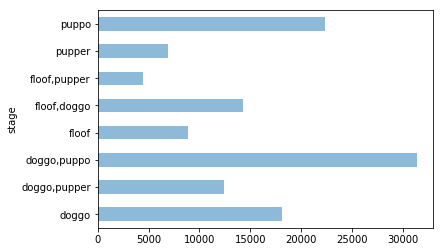

In [58]:
copy_all.groupby('stage')['favorite'].mean().plot(kind = 'barh',stacked=True,alpha=0.5)

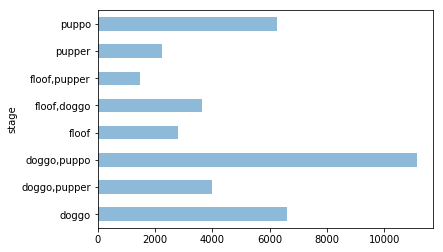

In [61]:
copy_all.groupby('stage')['retweet'].mean().plot(kind = 'barh',stacked=True,alpha=0.5)

In [62]:
copy_all['core_group'] = pd.cut(copy_all['rating_numerator'],range(0,35,5))
dog_favorite = copy_all.groupby('core_group').mean()['favorite']
dog_retweet = copy_all.groupby('core_group').mean()['retweet']
print (dog_favorite)
print (dog_retweet)

core_group
(0, 5]       3212.134146
(5, 10]      3456.025367
(10, 15]    12690.208297
(15, 20]             NaN
(20, 25]     5796.000000
(25, 30]     4475.500000
Name: favorite, dtype: float64
core_group
(0, 5]      1238.756098
(5, 10]     1244.242991
(10, 15]    3758.666379
(15, 20]            NaN
(20, 25]    1604.000000
(25, 30]    1170.500000
Name: retweet, dtype: float64


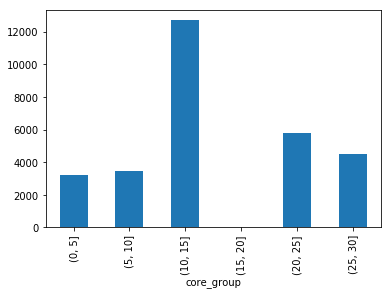

In [65]:
dog_favorite.plot(kind='bar', stacked=True)

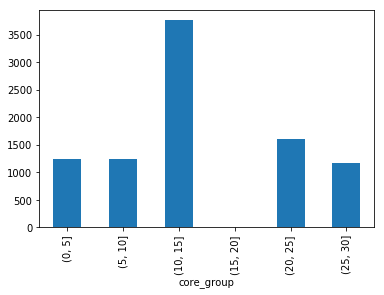

In [66]:
dog_retweet.plot(kind='bar', stacked=True)